In [15]:

import pandas as pd

# Load the dataset with semicolon as the delimiter
orders = pd.read_csv('orders.csv', sep=';')
print(orders.head())

       order_id origin_port    3pl customs_procedures logistic_hub   customer  \
0  366c7a3d298f   Rotterdam  v_002                DTP        Venlo  Marseille   
1  45f906331e10   Rotterdam  v_004                CRF         Rome  Marseille   
2  ac84a6e4af0f      Athens  v_002                CRF        Venlo      Paris   
3  f5e98cb29790   Rotterdam  v_004                CRF        Lille      Milan   
4  a9e7c9bee35b   Barcelona  v_002                CRF        Venlo     Berlin   

   product_id  units  late_order  
0     1692723    583        True  
1     1644308    459       False  
2     1684170    464        True  
3     1620510    678       False  
4     1699372    353       False  


In [16]:
orders.head(3)

order_id origin_port    3pl customs_procedures logistic_hub   customer  \
0  366c7a3d298f   Rotterdam  v_002                DTP        Venlo  Marseille   
1  45f906331e10   Rotterdam  v_004                CRF         Rome  Marseille   
2  ac84a6e4af0f      Athens  v_002                CRF        Venlo      Paris   

   product_id  units  late_order  
0     1692723    583        True  
1     1644308    459       False  
2     1684170    464        True

In [17]:
products = pd.read_csv('product_attributes.csv')
cities = pd.read_csv('cities_data.csv',sep=';')
print(products.head(5))
print(cities.head(5))

   product_id  weight  material_handling
0     1672707    2876                  3
1     1694456    2785                  5
2     1682865    2751                  3
3     1689146    2736                  0
4     1664069    2707                  4
  city_from_name city_to_name          city_from_coord  \
0     Dusseldorf     Zaragoza  (51.2254018, 6.7763137)   
1     Dusseldorf        Venlo  (51.2254018, 6.7763137)   
2     Dusseldorf   Bratislava  (51.2254018, 6.7763137)   
3     Dusseldorf      Hamburg  (51.2254018, 6.7763137)   
4     Dusseldorf         Rome  (51.2254018, 6.7763137)   

                       city_to_coord   distance  
0           (41.6521342, -0.8809428)  1214.4772  
1  (51.39244885, 6.1511724144122955)    47.3876  
2           (48.1516988, 17.1093063)   819.2894  
3             (53.550341, 10.000654)   339.2215  
4           (41.8933203, 12.4829321)  1125.0290  


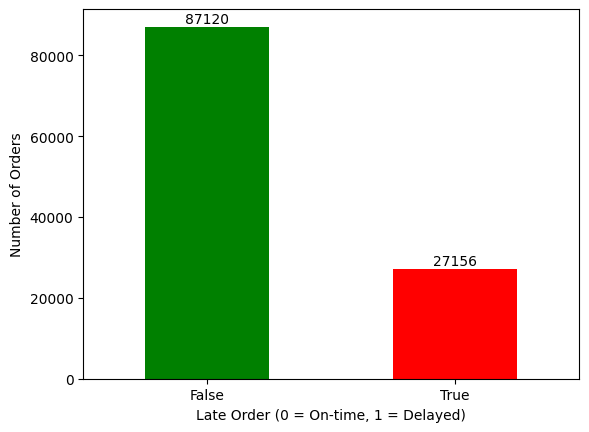

In [18]:
 import matplotlib.pyplot as plt

counts = orders['late_order'].value_counts()
counts.plot(kind='bar', color=['green', 'red'])
plt.xlabel("Late Order (0 = On-time, 1 = Delayed)")   # X-axis label
plt.ylabel("Number of Orders") 
plt.xticks(rotation=0) 
for i, count in enumerate(counts):
    plt.text(i, count + 1000, str(count), ha='center')  # Adjust '+5' as needed


In [19]:
orders['3pl']

0         v_002
1         v_004
2         v_002
3         v_004
4         v_002
          ...  
114271    v_002
114272    v_004
114273    v_002
114274    v_003
114275    v_002
Name: 3pl, Length: 114276, dtype: object

In [20]:
late_by_3pl = orders.groupby('3pl')['late_order'].mean().sort_values(ascending=False)
print(late_by_3pl)

3pl
v_001    0.382099
v_004    0.256949
v_003    0.250252
v_002    0.199447
Name: late_order, dtype: float64


In [21]:
# Step 1: Create a new column 'unit_range' by binning the 'units' values
orders['unit_range'] = pd.cut(
    orders['units'],
    bins=[0, 10, 50, 100, 500, 1000],
    labels=['1–10', '11–50', '51–100', '101–500', '501–1000']
)


In [22]:
late_by_range = orders.groupby('unit_range')['late_order'].mean()
print(late_by_range)



unit_range
1–10        1.000000
11–50       0.000000
51–100      0.666667
101–500     0.207284
501–1000    0.286448
Name: late_order, dtype: float64


C:\Users\91797\AppData\Local\Temp\ipykernel_14620\701866887.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_by_range = orders.groupby('unit_range')['late_order'].mean()


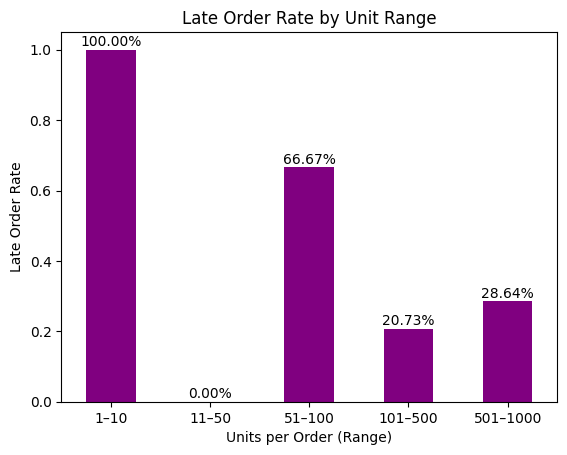

In [23]:
late_by_range.plot(kind='bar', color='purple')
plt.title("Late Order Rate by Unit Range")
plt.ylabel("Late Order Rate")
plt.xlabel("Units per Order (Range)")
plt.xticks(rotation=0)
for i, value in enumerate(late_by_range):
    plt.text(i, value + 0.01, f"{value:.2%}", ha='center', fontsize=10)

plt.show()



In [26]:
def parse_coordinates(coord_str):
    try:
        if pd.notnull(coord_str):
            # Remove parentheses and split by comma
            coord_str = coord_str.strip("() ")
            lat, lon = map(float, coord_str.split(','))
            return (lat, lon)
    except:
        return None
    return None

cities['city_from_coord'] = cities['city_from_coord'].apply(parse_coordinates)
cities['city_to_coord'] = cities['city_to_coord'].apply(parse_coordinates)


In [27]:
from geopy.distance import geodesic

def calculate_distance(row):
    if row['city_from_coord'] and row['city_to_coord']:
        return geodesic(row['city_from_coord'], row['city_to_coord']).km
    else:
        return None  # Return None if coordinates are missing

cities['distance_cal'] = cities.apply(calculate_distance, axis=1)


In [28]:
print(cities[['city_from_coord', 'city_to_coord']].head())
print(type(cities['city_from_coord'].iloc[0]))


           city_from_coord                      city_to_coord
0  (51.2254018, 6.7763137)           (41.6521342, -0.8809428)
1  (51.2254018, 6.7763137)  (51.39244885, 6.1511724144122955)
2  (51.2254018, 6.7763137)           (48.1516988, 17.1093063)
3  (51.2254018, 6.7763137)             (53.550341, 10.000654)
4  (51.2254018, 6.7763137)           (41.8933203, 12.4829321)
<class 'tuple'>


In [36]:
cities[['distance', 'distance_cal']].head()


distance  distance_cal
0  1214.4772     1214.4772
1    47.3876       47.3876
2   819.2894      819.2894
3   339.2215      339.2215
4  1125.0290     1125.0290

In [35]:
cities['distance_cal'] = cities['distance_cal'].round(4)
(cities['distance'].round(4) != cities['distance_cal'].round(4)).sum()


np.int64(0)

In [37]:
orders = orders.merge(cities, left_on=['origin_port', 'customer'], right_on=['city_from_name', 'city_to_name'], how='left')


In [39]:
print(orders[['origin_port', 'customer', 'city_from_name', 'city_to_name', 'distance']].head())


  origin_port   customer city_from_name city_to_name  distance
0   Rotterdam  Marseille      Rotterdam    Marseille  961.6350
1   Rotterdam  Marseille      Rotterdam    Marseille  961.6350
2      Athens      Paris            NaN          NaN       NaN
3   Rotterdam      Milan      Rotterdam        Milan  797.3505
4   Barcelona     Berlin            NaN          NaN       NaN


In [40]:
orders = orders.merge(products, on='product_id', how='left')

In [42]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -------------------------------------- - 8.7/8.9 MB 44.6 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 36.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   -------- ------------------------------- 8.4/41.3 MB 40.0 MB/s eta 0:00:01
   ----------------- ---------------------- 18.1/41.3 MB 42.2 MB/s eta 0:00:01
   ------------------------- -------------- 26.5/41.3 MB 40.9 MB/s eta 0:00:01
   ----------------------------- ---------- 30.7/41.3 MB 37.4 MB/s eta 0:00:01
   ---------------------------------- ----- 35.4/41.3 MB 33.6 MB/s eta 0:00:01
   ----------------------------------- ---- 37.0/41.3 MB 30.1 MB/s eta 0:00:01
   ---------------------------------------  41.2/41.3 MB 30.8 MB/s eta 0:00:01
   ---------------------------------------- 41.3/41.3 MB 27.3 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- -----

In [73]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enables the estimator
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant features and target
X = orders[['units', 'weight', 'distance', 'material_handling']]
y = orders['late_order']

# Automatically split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 📊 Print Evaluation Results
print(f"🌟 ROC-AUC Score: {auc:.4f}")
print(f"✅ Accuracy: {accuracy:.2f}")
print("🧮 Confusion Matrix:\n", conf_matrix)
print("📄 Classification Report:\n", class_report)




🌟 ROC-AUC Score: 0.6436
✅ Accuracy: 0.81
🧮 Confusion Matrix:
 [[16818   697]
 [ 3594  1747]]
📄 Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.96      0.89     17515
        True       0.71      0.33      0.45      5341

    accuracy                           0.81     22856
   macro avg       0.77      0.64      0.67     22856
weighted avg       0.80      0.81      0.78     22856



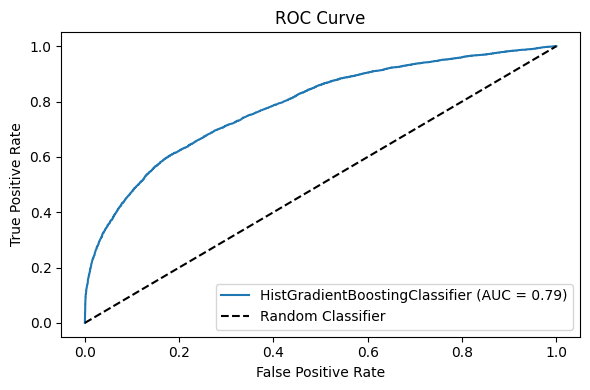

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Use predicted probabilities, not labels
y_scores = model.predict_proba(X_test)[:, 1]  # probability for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"HistGradientBoostingClassifier (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


In [68]:
X_all = orders[['units', 'weight', 'distance', 'material_handling']]


In [70]:
orders['predicted_late_order'] = model.predict(X_all)
orders['late_probability'] = model.predict_proba(X_all)[:, 1]
print(orders[['units', 'weight', 'distance', 
              'late_order', 'predicted_late_order', 'late_probability']])


        units  weight   distance  late_order  predicted_late_order  \
0         583  1778.0   961.6350        True                 False   
1         459  1088.0   961.6350       False                 False   
2         464   505.0        NaN        True                 False   
3         678  1308.0   797.3505       False                 False   
4         353  1465.0        NaN       False                 False   
...       ...     ...        ...         ...                   ...   
114271    645  1896.0   871.6731       False                  True   
114272    502   746.0        NaN       False                 False   
114273    464   572.0  1269.2365       False                 False   
114274    388  1894.0        NaN       False                 False   
114275    482  1308.0  1801.3393       False                 False   

        late_probability  
0               0.401652  
1               0.120340  
2               0.442896  
3               0.188718  
4               0.192057

In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(orders['late_order'], orders['predicted_late_order'])
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8143792222338899


In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(orders['late_order'], orders['predicted_late_order'])
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[83979  3141]
 [18071  9085]]


In [79]:
orders['late_probability'] = orders['late_probability'].astype(float)



In [82]:
high_risk_orders = orders[orders['late_probability'] > 0.8]
print(high_risk_orders[['order_id', 'customer', 'late_probability']])


            order_id   customer  late_probability
6       63964549191c      Milan          0.924805
13      a62b42a294e1     Berlin          0.804191
16      f8ff543ea3a6      Paris          0.978919
70      c92106eb9ef9  Marseille          0.957955
132     12ee79e07cb0     Madrid          0.870135
...              ...        ...               ...
114241  913cf3003488  Marseille          0.816898
114254  36445891b972       Lyon          0.991430
114258  b3498e8c84a3  Marseille          0.957080
114270  0be2008fd8e6     Munich          0.956513
114271  3f4b15fb770e   Bordeaux          0.868775

[4029 rows x 3 columns]


In [81]:
print("Rows > 0.80:", (orders['late_probability'] > 0.80).sum())
print("Rows > 0.85:", (orders['late_probability'] > 0.85).sum())


Rows > 0.80: 4029
Rows > 0.85: 3167


In [83]:
new_data = pd.DataFrame({
    'units': [580, 430],
    'weight': [1500.0, 900.0],
    'distance': [1000.0, 500.0],
    'material_handling': [2, 3]
})


In [84]:
predictions = model.predict(new_data)
probabilities = model.predict_proba(new_data)[:, 1]


In [85]:
new_data['predicted_late_order'] = predictions
new_data['late_probability'] = probabilities

print(new_data)


   units  weight  distance  material_handling  predicted_late_order  \
0    580  1500.0    1000.0                  2                 False   
1    430   900.0     500.0                  3                 False   

   late_probability  
0          0.177080  
1          0.146856  
